  # Simple RNN tutorial

So, why recurrent neural networks? Aren't conventional neural networks good enough? Turns out they aren't really. The reason is, normal NN process data as a blob of information regardless of time-dependent relationships, and it happens to be that, well, most of things happen in a time-oriented manner. 

Consider financial data such as closing prices per day, or Internet of Things applications that read from sensors that are permanently on; both of these, along with many other cases, can be treatead as time-series problems and as such something up to the challenge should be taken into account, hence let's discuss Recurrent Neural Networks!

##  The problem to solve

A very popular machine learning example is that of recognizing hand-written digits with a deep neural network. Normally, a simple NN can be used to solve this; however, this can also be framed as a time-dependent problem.

How so? Well, if we look at a picture from the very top to its end, as though our glance was a moving window that scans through the image, we could arguably say that, obviously, we see the bottom first and all the succesive portions afterwards as we shift our sight towards the segments from below. We could however just watch the image from afar and know what it is straigh away, but by scanning it from head to tail, we would still be able to tell what we are looking at.

Perhaps this is a extremely dull and simple analogy, but in terms of artificial neural network architectures this makes a lot of sense.

## The technical details of recurrent architectures

What makes the whole difference between recurrent and conventional NN architechtures is that the position of a certain feature within a sequence matters in recurrent networks, whereas in conventional NN the computation of a single neuron is just like a weighted sum that passes through an activation function with no consideration of the order in which inputs arrived. The way recurrent architectures handle timing is by having a hidden state, or internal memory, that remembers the time step at which a particular feature was observed.

There is a conventional diagram used to depict this that illustrates a RNN architecture as one that has a loop.

!["RNN diagram"](https://machinelearningblogcom.files.wordpress.com/2018/02/bildschirmfoto-2018-02-21-um-10-30-04.png?w=1400)

The idea is that as an input, at a certain time step, goes through the network and there can be two outputs: a normal output and another one that is reintroduced to the network at the next timestep, this is how the architecture keeps track of what it has seen before.

So, from the diagram above, consider the output __h<sub>t</sub>__. At that point, the network not only considers its immediate input __x<sub>t</sub>__, it also takes into account __x<sub>2</sub>__, __x<sub>1</sub>__ and __x<sub>0</sub>__ as well and it does so thanks to the hidden, or memory, state represented by __A__.

Let's now represent this ideas mathematically.

###  Forward propagation

####  Hidden state

The expression to handle the memory state can be represented as follows:

$$
a^{<t+1>}= g\big(W_{aa}\cdot a^{<t>} + W_{ax}\cdot x^{<t+1>} + b_{a}\big)
$$

Where,
  * $a^{<t>}$ is the hidden state's output at time $t$
  * $x^{<t>}$ is a feature vector that holds a sequence, the superscript $t$ represents the position of an element, or time step, within that sequence
  * $g$ is an activation function, normally $tanh$
  * $b_{a}$ is the hidden state's bias
  * Both $W_{aa}$ and $W_{ax}$ represent weight matrices. The first index $a$ denote that these matrices are used to compute a hidden state $a$, and the second index, either $a$ or $x$, signal to what other quantity the matrix is going to be multiplied to (an input state or a hidden state).
  

#### Output

The regular output at $t$ is equal to the hidden state's value plus a bias, then this result is passed through an activation function. The notation for this equation should be interpreted the same way as the case for the hidden state equation. The activation function $s$ is normally a _sigmoid_ function.

$$
h^{<t>} = s\big(W_{ya}\cdot a^{<t>} + b_{y}\big)
$$

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True);

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


The relevant part is the transpose.The second argument of the next block of code's third line states that the first and second indexes of the tensor are going to be swaped. This means that __from__ having a set of __128 elements__, each of which being a __28 x 28 matrix__, the transpose method will convert the tensor __to__ a __28__ set of __128 x 28__ matrices.

But why? And what does the transposition even mean? How can this transformation be interpreted in terms of the data? Well, to begin with consider a single example of the initial dataset without applying and transpositions.

In [6]:
batch_x, batch_y = mnist.train.next_batch(128)
batch_x = batch_x.reshape((128, 28, 28))
inputs_ = np.transpose(batch_x,(1,0,2))

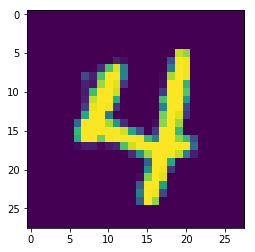

In [7]:
plt.imshow(batch_x[0]);

A single observation is a 28 x 28 pixel image, and we have 128 of these. So, if the first index refers to the number of elements and the second to the rows of each image, swaping these indexes means that we'll have 28 elements with 128 rows and 28 columns. To make the idea clearer, let's see a single observation of the new transposed dataset.

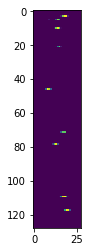

In [8]:
plt.imshow(inputs_[3])

So, actually, what we end up with is a set of all 28 timesteps for all images. In other words, a single element from the transposed dataset, say the 4<sup>rd</sup> one, refers to a matrix where each row is the 4<sup>rd</sup> row of all 128 images. And, since we now have 28 elements in the transposed set, the first element is an image with all the 1<sup>st</sup> rows from all images, the second is al the 2<sup>nd</sup> rows, and so on.

Let's see them all toghether.

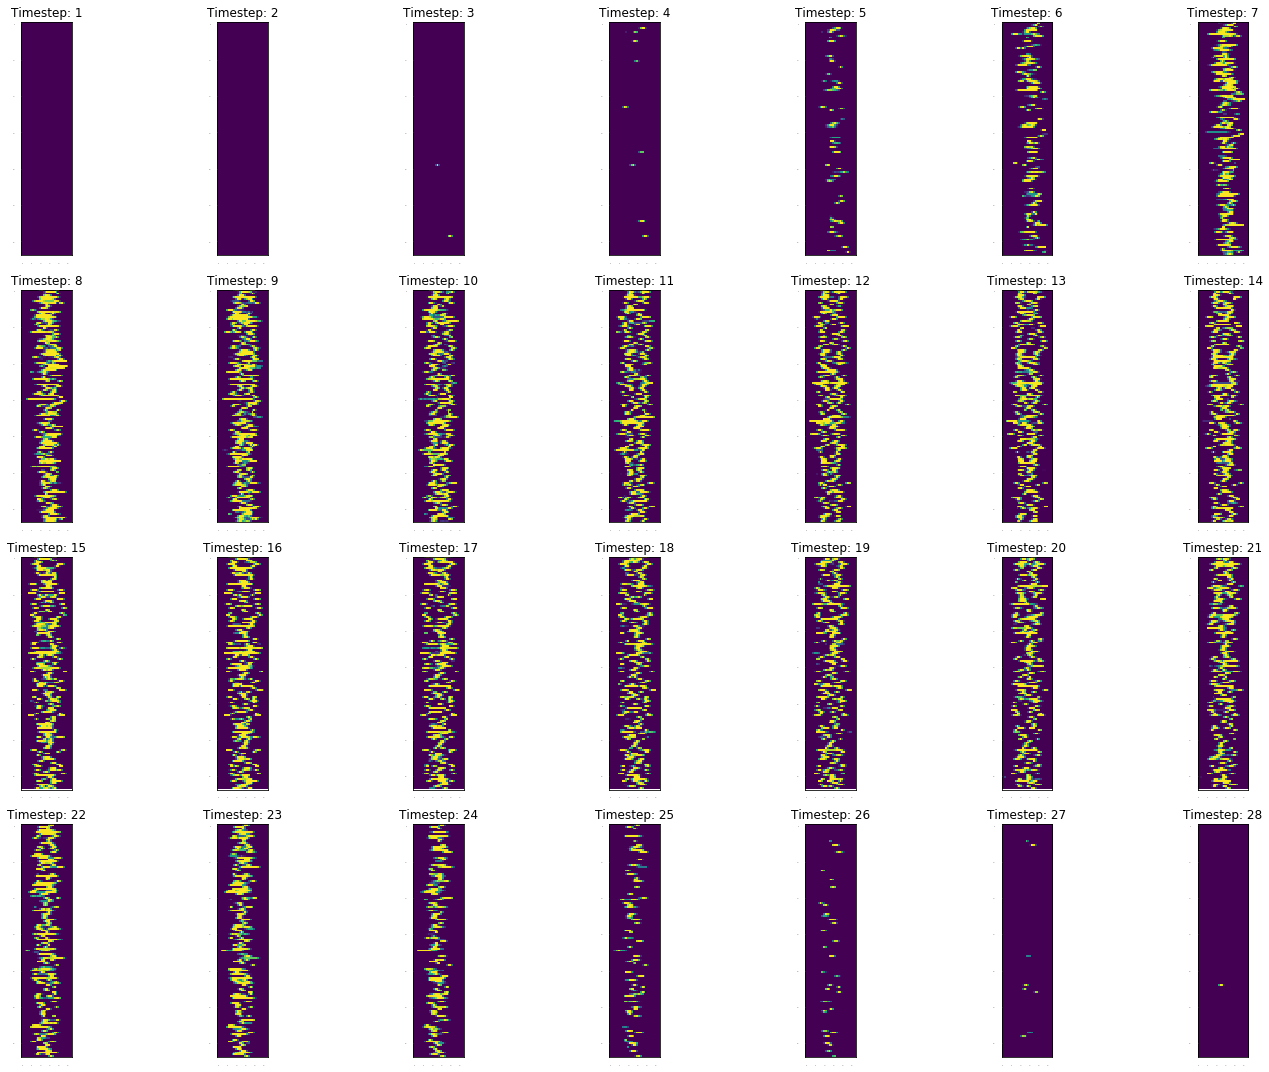

In [9]:
fig, ax = plt.subplots(nrows=4,ncols=7,figsize=(20,15),sharex=False,sharey=False)

ix_ = 0
for row in ax:
    for col in row:
        col.imshow(inputs_[ix_])
        col.set_title('Timestep: ' + str(ix_ + 1))
        col.tick_params(labelsize=0,color='white')
        ix_ += 1

plt.tight_layout()